Saving woman-6328478_960_720.jpg to woman-6328478_960_720 (1).jpg


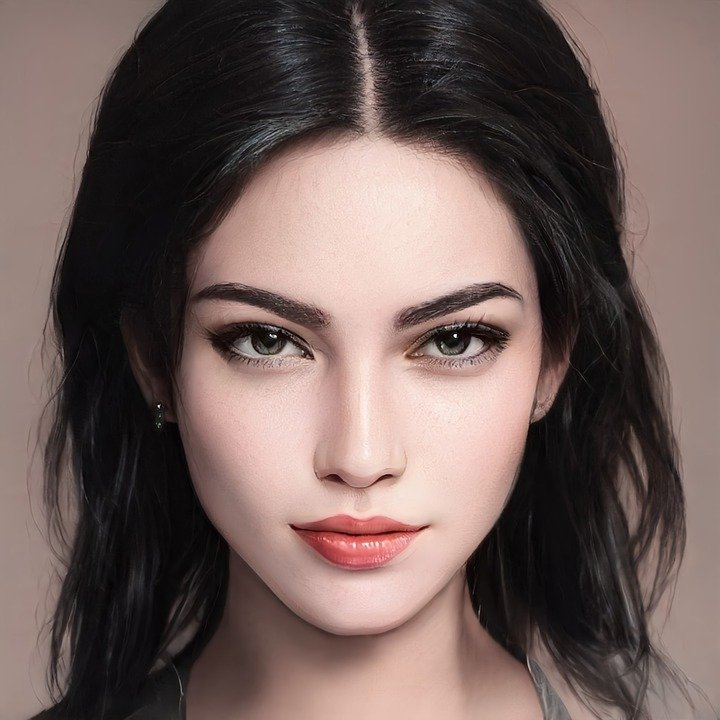

In [4]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))
img = cv2.imread(filename)
cv2_imshow(img)

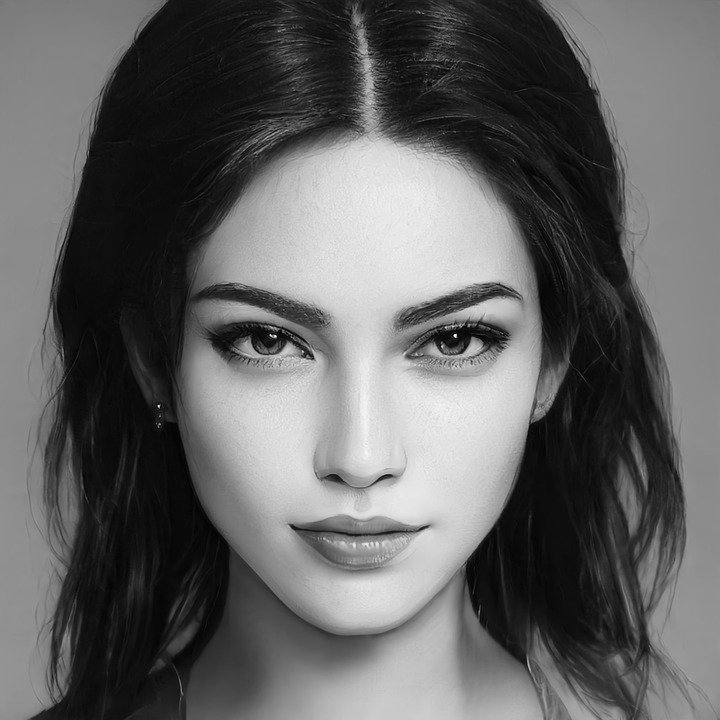

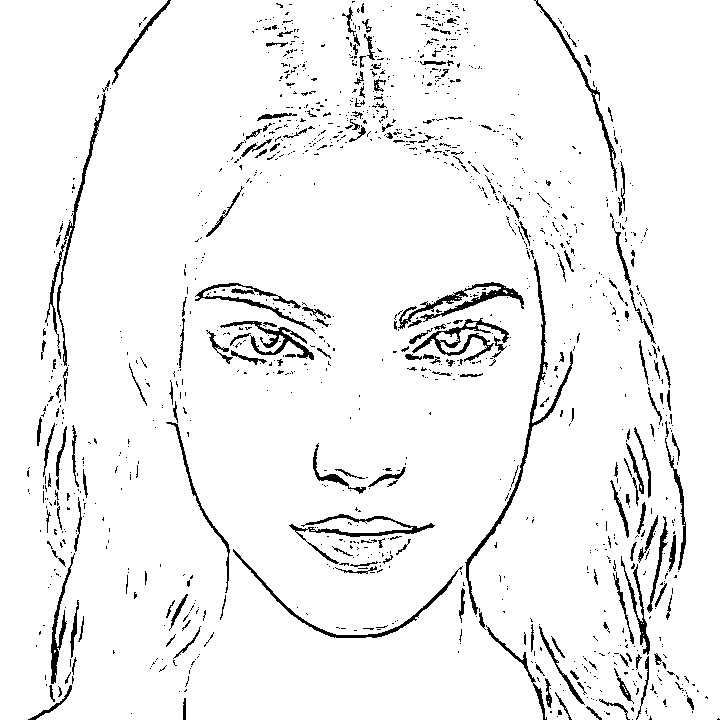

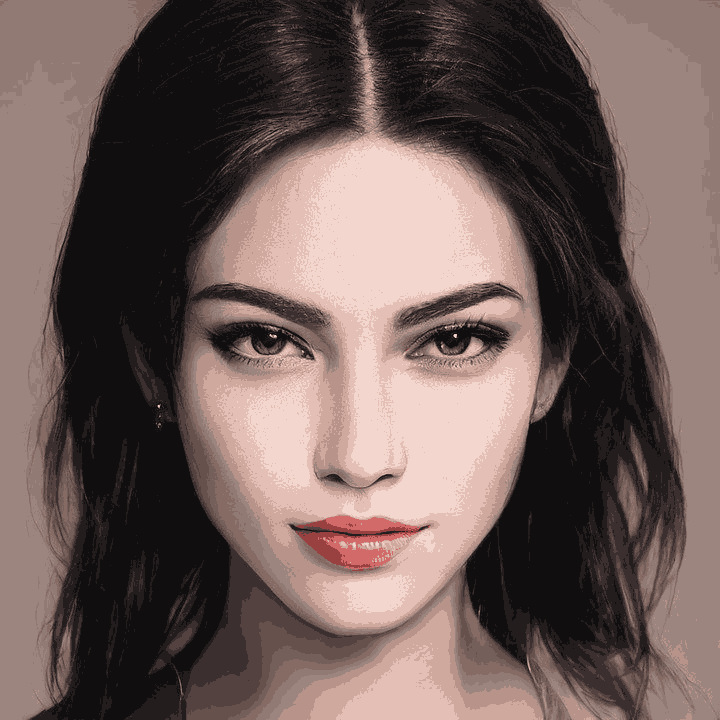

In [5]:
def edge_mask(img, line_size, blur):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2_imshow(gray)
  gray_blur = cv2.medianBlur(gray, blur)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur)
  return edges

line_size=7
blur_value=5

edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

def color_quant(img, k):
  data = np.float32(img).reshape((-1, 3))

  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

total_color = 15
img = color_quant(img, total_color)
cv2_imshow(img)

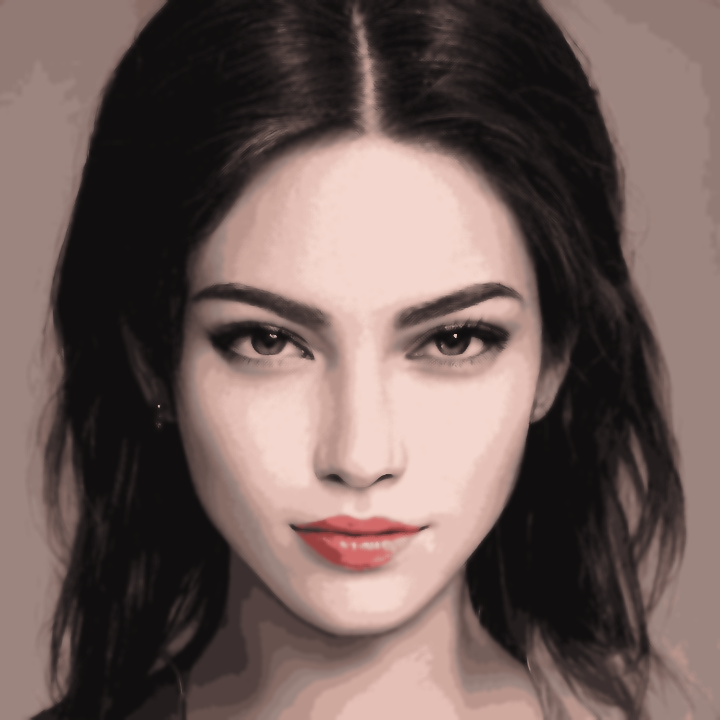

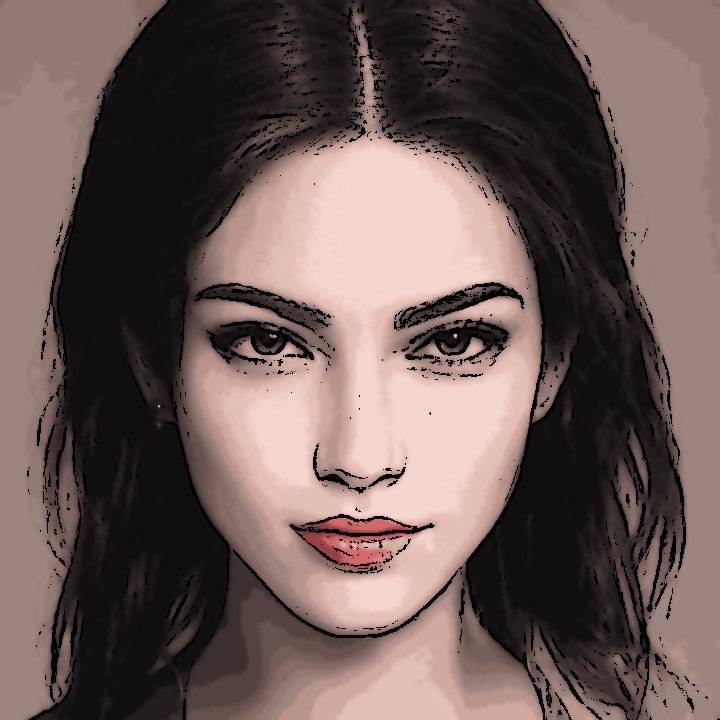

In [6]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200, sigmaSpace=200)
cv2_imshow(blurred)

cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)